# Analysis of Fitting Data of Models

## Things to be done
- Read tables of fitting info from results directory and transform it as DataFrame
- Merge ID, aic, bic, aicc, rsq columns as one table
- Add best_fit column to find the model with the lowest aicc value
- Calculate percentage of each model with lowest aicc value during fitting all IDs
- Plot bar chart of the percentage

In [1]:
# import packages
import pandas as pd
import numpy as np
import matplotlib as plt


In [4]:
quad_fitting_info = pd.DataFrame(pd.read_csv("../Results/Fitting_info/quad_info.csv"))
cubic_fitting_info = pd.DataFrame(pd.read_csv("../Results/Fitting_info/cubic_info.csv"))
briere_fitting_info = pd.DataFrame(pd.read_csv("../Results/Fitting_info/Briere_info.csv"))
school_fitting_info = pd.DataFrame(pd.read_csv("../Results/Fitting_info/Schoolfield_info.csv"))
arr_before = pd.DataFrame(pd.read_csv("../Results/Fitting_info/Arrhenius_before_info.csv"))
arr_after = pd.DataFrame(pd.read_csv("../Results/Fitting_info/Arrhenius_after_info.csv"))

quad_subset = quad_fitting_info[["id", "aic", "bic", "aicc", "Rsq"]]
quad_subset = quad_subset.rename(columns = {"aic": "quad_aic", "bic": "quad_bic", "aicc": "quad_aicc", "Rsq": "quad_Rsquared"})

cubic_subset = cubic_fitting_info[["aic", "bic", "aicc", "Rsq"]]
cubic_subset = cubic_subset.rename(columns = {"aic": "cubic_aic", "bic": "cubic_bic", "aicc": "cubic_aicc", "Rsq": "cubic_Rsquared"})

briere_subset = briere_fitting_info[["aic", "bic", "aicc", "Rsq"]]
briere_subset = briere_subset.rename(columns = {"aic": "briere_aic", "bic": "briere_bic", "aicc": "briere_aicc", "Rsq": "briere_Rsquared"})

school_subset = school_fitting_info[["aic", "bic", "aicc", "Rsq"]]
school_subset = school_subset.rename(columns = {"aic": "school_aic", "bic": "school_bic", "aicc": "school_aicc", "Rsq": "school_Rsquared"})

In [3]:
school_fitting_info[school_fitting_info["id"] == 690]

,id,B0,E,Th,Eh,chisqr,RSS,TSS,Rsq,aic,bic,aicc,RSS_log,TSS_log,Rsq_log,aic_log,bic_log,aicc_log
673,690,9.992345,2.887872,297.400735,4.117591,3.105119,3.920878e+06,3.330986e+06,-0.177092,107.367663,106.534701,NaN,3.105119,3.63255,0.145196,22.242055,23.075017,NaN


In [5]:
arr_after[arr_after["id"] == 690]

,Unnamed: 0,id,B0_log_after_deactivation,E_after_deactivation,RSS_after_deactivation,TSS_after_deactivation,Rsq_after_deactivation,aic_after_deactivation,bic_after_deactivation,aicc_after_deactivation
673,0,690,0.000018,68.541473,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
briere_subset.describe()

,briere_aic,briere_bic,briere_aicc,briere_Rsquared
count,629.000000,629.000000,629.000000,629.000000
mean,35.349120,35.956091,42.357368,0.450308
std,80.027237,80.942723,79.521422,1.508798
min,-111.659948,-108.826631,-110.059948,-19.373846
25%,5.607180,6.342890,14.345011,0.574405
50%,30.857002,31.621528,39.576073,0.869171
75%,48.770880,49.338990,56.792088,0.966855
max,1416.963261,1428.613228,1417.030867,0.999417


In [7]:
school_subset.describe()

,school_aic,school_bic,school_aicc,school_Rsquared
count,629.000000,629.000000,629.000000,629.000000
mean,54.048994,54.858289,73.676995,-19.714627
std,245.586155,246.727436,244.454663,260.142779
min,-195.067436,-179.042023,-194.967685,-5803.995426
25%,9.900519,10.450130,30.757206,0.076890
50%,35.815237,36.182998,57.222400,0.688434
75%,62.617662,62.908125,84.587993,0.938768
max,5493.872514,5511.699593,5493.935805,0.999832


In [50]:
frames = [quad_subset, cubic_subset, briere_subset, school_subset]
frames

[      id   quad_aic   quad_bic  quad_aicc  quad_Rsquared
 0      3  -0.810193   0.097562   7.189807       0.414072
 1      4 -12.470234 -12.632503   7.529766       0.982559
 2      5 -20.604592 -19.149872 -14.890307       0.926296
 3      6 -24.806162 -24.567837 -11.472828       0.900916
 4      8  -1.934454  -1.696130  11.398879       0.993327
 ..   ...        ...        ...        ...            ...
 624  851 -77.620671 -75.925823 -72.620671       0.997344
 625  900  -4.749234  -5.373956  35.250766       0.996802
 626  901  18.456168  17.831447  58.456168       0.847264
 627  902   0.102563  -0.522158  40.102563       0.994516
 628  903   2.946419   2.321697  42.946419       0.983130
 
 [629 rows x 5 columns],
      cubic_aic  cubic_bic  cubic_aicc  cubic_Rsquared
 0    -3.050255  -1.839915    4.949745        0.616557
 1   -12.668439 -12.884798    7.331561        0.987259
 2   -19.071221 -17.131595  -13.356936        0.929107
 3   -22.941231 -22.623465   -9.607898        0.902575
 4

In [51]:
all_fitting_info = pd.concat(frames, axis=1)
all_fitting_info

,id,quad_aic,quad_bic,quad_aicc,quad_Rsquared,cubic_aic,cubic_bic,cubic_aicc,cubic_Rsquared,briere_aic,briere_bic,briere_aicc,briere_Rsquared,school_aic,school_bic,school_aicc,school_Rsquared
0,3,-0.810193,0.097562,7.189807,0.414072,-3.050255,-1.839915,4.949745,0.616557,-1.637893,-0.730138,2.362107,0.460616,2.471891,3.682231,10.471891,0.333923
1,4,-12.470234,-12.632503,7.529766,0.982559,-12.668439,-12.884798,7.331561,0.987259,-14.843520,-15.005790,-6.843520,0.987574,1.533005,1.316646,21.533005,0.903110
2,5,-20.604592,-19.149872,-14.890307,0.926296,-19.071221,-17.131595,-13.356936,0.929107,-20.524264,-19.069544,-17.524264,0.925801,-16.260106,-14.320479,-10.545820,0.910393
3,6,-24.806162,-24.567837,-11.472828,0.900916,-22.941231,-22.623465,-9.607898,0.902575,-24.223333,-23.985008,-18.223333,0.893428,-20.181484,-19.863717,-6.848150,0.862441
4,8,-1.934454,-1.696130,11.398879,0.993327,0.003168,0.320935,13.336502,0.993379,23.038182,23.276506,29.038182,0.848636,40.157205,40.474972,53.490539,-0.001814
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
624,851,-77.620671,-75.925823,-72.620671,0.997344,-81.529328,-79.269531,-76.529328,0.998314,-80.044872,-78.350024,-77.378205,0.997796,-5.668502,-3.408704,-0.668502,0.423084
625,900,-4.749234,-5.373956,35.250766,0.996802,-2.798135,-3.631097,37.201865,0.996828,35.413996,34.789274,47.413996,-1.581994,31.754103,30.921141,71.754103,-0.005260
626,901,18.456168,17.831447,58.456168,0.847264,5.862094,5.029132,45.862094,0.986585,24.543584,23.918863,36.543584,0.578728,22.392873,21.559911,62.392873,0.789077
627,902,0.102563,-0.522158,40.102563,0.994516,-5.923917,-6.756879,34.076083,0.998561,-0.741003,-1.365724,11.258997,0.995235,17.476093,16.643131,57.476093,0.928898


In [79]:
fitting_info_aicc = all_fitting_info[
    ["quad_aicc", "cubic_aicc", "briere_aicc", "school_aicc"]]
fitting_info_aicc['best_fit'] = fitting_info_aicc.idxmin(axis = 1)
all_fitting_info["best_fit"] = fitting_info_aicc["best_fit"]
all_fitting_info

,id,quad_aic,quad_bic,quad_aicc,quad_Rsquared,cubic_aic,cubic_bic,cubic_aicc,cubic_Rsquared,briere_aic,briere_bic,briere_aicc,briere_Rsquared,school_aic,school_bic,school_aicc,school_Rsquared,best_fit
0,3,-0.810193,0.097562,7.189807,0.414072,-3.050255,-1.839915,4.949745,0.616557,-1.637893,-0.730138,2.362107,0.460616,2.471891,3.682231,10.471891,0.333923,briere_aicc
1,4,-12.470234,-12.632503,7.529766,0.982559,-12.668439,-12.884798,7.331561,0.987259,-14.843520,-15.005790,-6.843520,0.987574,1.533005,1.316646,21.533005,0.903110,briere_aicc
2,5,-20.604592,-19.149872,-14.890307,0.926296,-19.071221,-17.131595,-13.356936,0.929107,-20.524264,-19.069544,-17.524264,0.925801,-16.260106,-14.320479,-10.545820,0.910393,briere_aicc
3,6,-24.806162,-24.567837,-11.472828,0.900916,-22.941231,-22.623465,-9.607898,0.902575,-24.223333,-23.985008,-18.223333,0.893428,-20.181484,-19.863717,-6.848150,0.862441,briere_aicc
4,8,-1.934454,-1.696130,11.398879,0.993327,0.003168,0.320935,13.336502,0.993379,23.038182,23.276506,29.038182,0.848636,40.157205,40.474972,53.490539,-0.001814,quad_aicc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
624,851,-77.620671,-75.925823,-72.620671,0.997344,-81.529328,-79.269531,-76.529328,0.998314,-80.044872,-78.350024,-77.378205,0.997796,-5.668502,-3.408704,-0.668502,0.423084,briere_aicc
625,900,-4.749234,-5.373956,35.250766,0.996802,-2.798135,-3.631097,37.201865,0.996828,35.413996,34.789274,47.413996,-1.581994,31.754103,30.921141,71.754103,-0.005260,quad_aicc
626,901,18.456168,17.831447,58.456168,0.847264,5.862094,5.029132,45.862094,0.986585,24.543584,23.918863,36.543584,0.578728,22.392873,21.559911,62.392873,0.789077,briere_aicc
627,902,0.102563,-0.522158,40.102563,0.994516,-5.923917,-6.756879,34.076083,0.998561,-0.741003,-1.365724,11.258997,0.995235,17.476093,16.643131,57.476093,0.928898,briere_aicc


In [82]:
best_briere = len(fitting_info_aicc[fitting_info_aicc.best_fit == "briere_aicc"]) / len(fitting_info_aicc)
best_quad = len(fitting_info_aicc[fitting_info_aicc.best_fit == "quad_aicc"]) / len(fitting_info_aicc)
best_cubic = len(fitting_info_aicc[fitting_info_aicc.best_fit == "cubic_aicc"]) / len(fitting_info_aicc)
best_school = len(fitting_info_aicc[fitting_info_aicc.best_fit == "school_aicc"]) / len(fitting_info_aicc)

In [86]:
print("The ratio of Briere model with lowerst AICc value in all fitted ID is %3f" % best_briere)
print("The ratio of Simplified Schoolfield model with lowerst AICc value in all fitted ID is %3f " % best_school)
print("The ratio of quadratic model with lowerst AICc value in all fitted ID is %3f" % best_quad)
print("The ratio of cubic model with lowerst AICc value in all fitted ID is %3f" % best_cubic)

The ratio of Briere model with lowerst AICc value in all fitted ID is 0.558029
The ratio of Simplified Schoolfield model with lowerst AICc value in all fitted ID is 0.001590 
The ratio of quadratic model with lowerst AICc value in all fitted ID is 0.127186
The ratio of cubic model with lowerst AICc value in all fitted ID is 0.313196


(array([351.,   0.,   0.,  80.,   0.,   0., 197.,   0.,   0.,   1.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

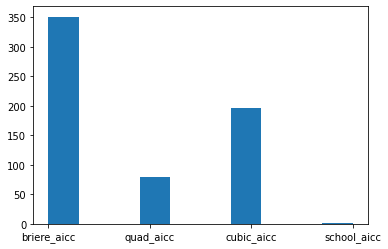

In [88]:
plt.pyplot.hist(all_fitting_info["best_fit"])

In [89]:
# Save the data
all_fitting_info.to_csv("../Results/all_fitting_info.csv", index = False)

## Check all_fitting_info tables

In [93]:
all_fitting_info[["quad_Rsquared", "cubic_Rsquared", "briere_Rsquared", "school_Rsquared"]].describe()

,quad_Rsquared,cubic_Rsquared,briere_Rsquared,school_Rsquared
count,629.000000,629.000000,629.000000,599.000000
mean,0.843674,0.900076,-0.210056,0.394370
std,0.195947,0.174601,4.311685,0.417475
min,0.007316,0.016701,-64.005839,-1.272618
25%,0.776917,0.901774,0.475188,-0.003792
50%,0.923987,0.972485,0.854507,0.453184
75%,0.976550,0.992276,0.964960,0.777086
max,0.999804,0.999987,0.999417,0.999359


In [102]:
all_fitting_info[all_fitting_info["school_Rsquared"] < -1]

,id,quad_aic,quad_bic,quad_aicc,quad_Rsquared,cubic_aic,cubic_bic,cubic_aicc,cubic_Rsquared,briere_aic,briere_bic,briere_aicc,briere_Rsquared,school_aic,school_bic,school_aicc,school_Rsquared,best_fit
192,271,77.990553,78.898309,85.990553,0.954832,69.034321,70.244662,77.034321,0.984899,93.928721,94.836476,97.928721,0.777662,119.173612,120.383953,127.173612,-1.272618,cubic_aicc
